In [1]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
pred_csvs = !ls /home/pataki/patho_scientificdata/modeling/fold*/*pred*
pred_csvs

['/home/pataki/patho_scientificdata/modeling/fold1/preds.csv',
 '/home/pataki/patho_scientificdata/modeling/fold2/preds.csv',
 '/home/pataki/patho_scientificdata/modeling/fold3/preds.csv',
 '/home/pataki/patho_scientificdata/modeling/fold4/preds.csv',
 '/home/pataki/patho_scientificdata/modeling/fold5/preds.csv']

In [3]:
preds = pd.DataFrame()
for i in pred_csvs:
    preds = preds.append(pd.read_csv(i))
    
preds.pop('Unnamed: 0');    
preds.head()

,fname,topleft_x,topleft_y,lowgrade_dysplasia,highgrade_dysplasia,adenocarcinoma,suspicious_for_invasion,inflammation,resection_edge,tumor_necrosis,...,pred_lowgrade_dysplasia,pred_highgrade_dysplasia,pred_adenocarcinoma,pred_suspicious_for_invasion,pred_inflammation,pred_resection_edge,pred_tumor_necrosis,pred_lymphovascular_invasion,pred_artifact,pred_normal
0,/home/pataki/patho_scientificdata/patched_data...,144083,157355,1,0,0,0,0,0,0,...,0.466596,0.077724,0.015098,0.002213,0.011297,0.000038,0.002028,5.960464e-07,0.000979,0.265015
1,/home/pataki/patho_scientificdata/patched_data...,144083,157867,1,0,0,0,0,0,0,...,0.901163,0.032802,0.004146,0.000836,0.000913,0.000006,0.004415,0.000000e+00,0.001171,0.036027
2,/home/pataki/patho_scientificdata/patched_data...,144083,158379,1,0,0,0,0,0,0,...,0.435219,0.029126,0.001606,0.000094,0.000980,0.000005,0.000088,0.000000e+00,0.009684,0.161044
3,/home/pataki/patho_scientificdata/patched_data...,144083,158891,1,0,0,0,0,0,0,...,0.118716,0.248274,0.008929,0.012510,0.004893,0.000036,0.001021,5.960464e-08,0.002625,0.045443
4,/home/pataki/patho_scientificdata/patched_data...,144083,162987,1,0,0,0,0,0,0,...,0.381180,0.049391,0.010376,0.015327,0.021905,0.000352,0.019253,5.215406e-06,0.002075,0.429759


In [4]:
preds.columns.values

array(['fname', 'topleft_x', 'topleft_y', 'lowgrade_dysplasia',
       'highgrade_dysplasia', 'adenocarcinoma', 'suspicious_for_invasion',
       'inflammation', 'resection_edge', 'tumor_necrosis',
       'lymphovascular_invasion', 'artifact', 'normal',
       'n_masks_for_slide', 'slideID', 'pred_lowgrade_dysplasia',
       'pred_highgrade_dysplasia', 'pred_adenocarcinoma',
       'pred_suspicious_for_invasion', 'pred_inflammation',
       'pred_resection_edge', 'pred_tumor_necrosis',
       'pred_lymphovascular_invasion', 'pred_artifact', 'pred_normal'],
      dtype=object)

In [5]:
preds.shape

(1554154, 25)

In [6]:
labels = ['lowgrade_dysplasia',
          'highgrade_dysplasia', 'adenocarcinoma', 'suspicious_for_invasion',
          'inflammation', 'resection_edge', 'tumor_necrosis',
          'artifact', 'normal']

In [7]:
auc_dict       = {}
recall_dict    = {}
precision_dict = {}

for l in labels:
    true_values = preds[l].values
    predictions = preds['pred_' + l].values
    
    auc_dict[l]       = np.round(roc_auc_score(y_true = true_values, y_score = predictions), 4)
    recall_dict[l]    = np.round(recall_score(y_true = true_values, y_pred = predictions > 0.5), 4)
    precision_dict[l] = np.round(precision_score(y_true = true_values, y_pred = predictions > 0.5), 4)

In [8]:
precision_dict

{'lowgrade_dysplasia': 0.8007,
 'highgrade_dysplasia': 0.2347,
 'adenocarcinoma': 0.4189,
 'suspicious_for_invasion': 0.0217,
 'inflammation': 0.0431,
 'resection_edge': 0.0,
 'tumor_necrosis': 0.2751,
 'artifact': 0.0843,
 'normal': 0.6855}

In [9]:
recall_dict

{'lowgrade_dysplasia': 0.795,
 'highgrade_dysplasia': 0.0766,
 'adenocarcinoma': 0.1867,
 'suspicious_for_invasion': 0.0045,
 'inflammation': 0.0136,
 'resection_edge': 0.0,
 'tumor_necrosis': 0.136,
 'artifact': 0.0099,
 'normal': 0.736}

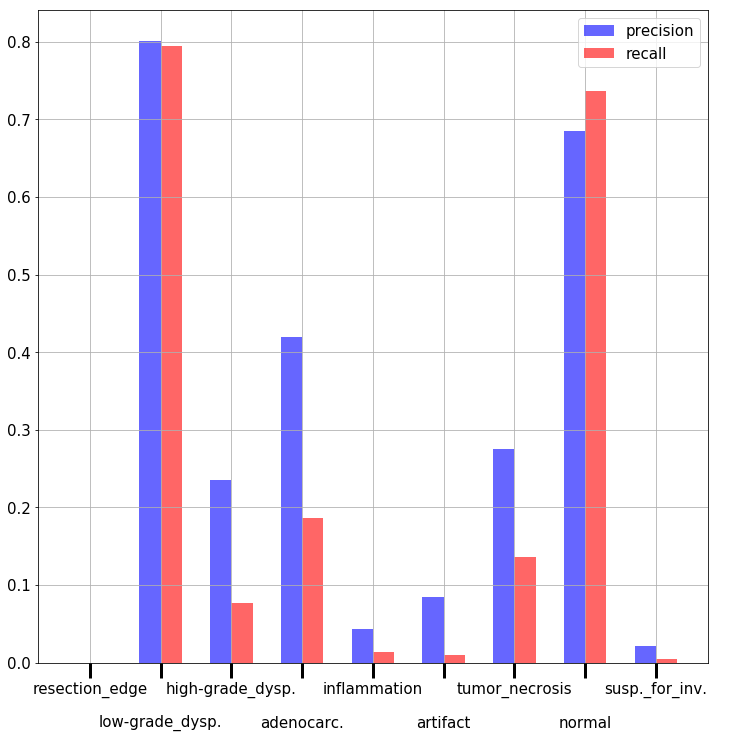

In [10]:
tmp_label_order = ['resection_edge', 'lowgrade_dysplasia',
                   'highgrade_dysplasia', 'adenocarcinoma', 
                   'inflammation',  
                   'artifact', 'tumor_necrosis', 'normal', 'suspicious_for_invasion']

plt.figure(figsize=(12, 12))
d = 0.15
for idx, i in enumerate(tmp_label_order):
    if idx == 0:
        plt.bar([idx-d], [precision_dict[i]], width=d*2, color='blue', alpha=0.6, label='precision')
        plt.bar([idx+d], [recall_dict[i]], width=d*2, color='red', alpha=0.6, label='recall')
    else:
        plt.bar([idx-d], [precision_dict[i]], width=d*2, color='blue', alpha=0.6)
        plt.bar([idx+d], [recall_dict[i]], width=d*2, color='red', alpha=0.6)

tmp_label_order[1] = '\n\n' + tmp_label_order[1]
tmp_label_order[3] = '\n\n' + tmp_label_order[3]
tmp_label_order[5] = '\n\n' + tmp_label_order[5]
tmp_label_order[7] = '\n\n' + tmp_label_order[7]
for idx, i in enumerate(tmp_label_order):
    tmp_label_order[idx] = (tmp_label_order[idx].replace('suspicious', 'susp.')
                            .replace('invasion', 'inv.')
                            .replace('highgrade_dysplasia', 'high-grade_dysp.')
                            .replace('lowgrade_dysplasia', 'low-grade_dysp.')
                            .replace('adenocarcinoma', 'adenocarc.'))

plt.xticks(list(range(len(labels))), tmp_label_order, rotation=0, fontsize=15) 
plt.tick_params('x', length=15, width=3, which='major')

plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.grid()
plt.show()

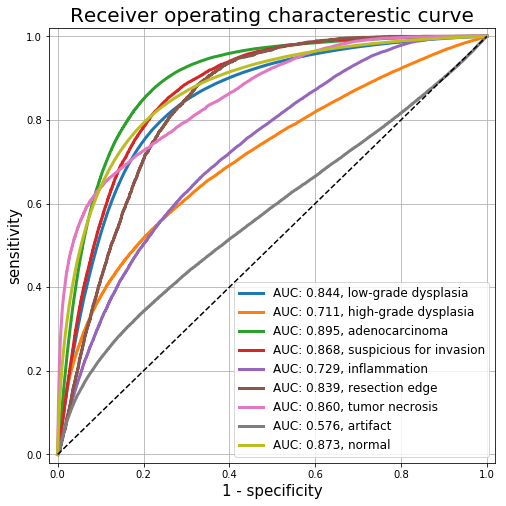

In [11]:
plt.figure(figsize=(8,8))

for l in labels:
        auc = np.round(roc_auc_score(y_true = preds[l].values, y_score = preds['pred_' + l].values), 3)
        fpr, tpr, th = roc_curve(y_true = preds[l].values, y_score = preds['pred_' + l].values)        
        plt.plot(fpr, tpr, label=f"AUC: {str(auc).ljust(5, '0')}, {l.replace('_', ' ').replace('grade', '-grade')}", lw=3)

plt.xlim(-0.02, 1.02)
plt.ylim(-0.02, 1.02)
plt.plot([0, 1], [0, 1], '--', c='k')
plt.legend(fontsize=12)
plt.xlabel('1 - specificity', fontsize=15)
plt.ylabel('sensitivity', fontsize=15)
plt.title('Receiver operating characterestic curve', fontsize=20)
plt.grid()
plt.show()